### 1. Librerias

In [1]:
import pandas as pd
import numpy as np

### 2. Carga de datos

In [2]:
ruta = 'C:/Users/Daniel/Documents/proyectos/riesgos/one year pd/chap2oneypd.csv'

In [24]:
df = pd.read_csv(ruta)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25906 entries, 0 to 25905
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             25906 non-null  int64  
 1   vintage_year                   25906 non-null  int64  
 2   monthly_installment            25906 non-null  float64
 3   loan_balance                   25906 non-null  float64
 4   bureau_score                   25473 non-null  float64
 5   num_bankrupt_iva               25473 non-null  float64
 6   time_since_bankrupt            25473 non-null  float64
 7   num_ccj                        25473 non-null  float64
 8   time_since_ccj                 25473 non-null  float64
 9   ccj_amount                     25473 non-null  float64
 10  num_bankrupt                   25473 non-null  float64
 11  num_iva                        25473 non-null  float64
 12  min_months_since_bankrupt      25473 non-null 

### 3. Limpieza y tratamiento de datos

In [26]:
df['max_arrears_12m'] = df['max_arrears_12m'].round(4)
df['arrears_months'] = df['arrears_months'].round(4)

In [27]:
# armar una función con lambda para que haga el cambio en todas las columnas que tengan 'date' en su nombre
from datetime import datetime
df['origination_date2'] = pd.to_datetime(df['origination_date'])
df['origination_date2'] = df['origination_date2'].dt.strftime('%Y-%m-%d')

df['maturity_date2'] = pd.to_datetime(df['maturity_date'])
df['maturity_date2'] = df['maturity_date2'].dt.strftime('%Y-%m-%d')

df['recent_arrears_date2'] = pd.to_datetime(df['recent_arrears_date'])
df['recent_arrears_date2'] = df['recent_arrears_date2'].dt.strftime('%Y-%m-%d')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8940\2291711405.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['origination_date2'] = pd.to_datetime(df['origination_date'])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8940\2291711405.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['maturity_date2'] = pd.to_datetime(df['maturity_date'])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8940\2291711405.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['recent_arrears_date2'] = pd.to_datetime(df['recent_arrears_date'])


#### 3.1 Identificación de 'NaN'

In [28]:
# recent_arrears_date, months_since_2mia tienen un alto porcentaje de 'nan' por lo tanto no se consideran 
# eliminación de los registros con nan de la variables bureau_score,num_bankrupt_iva,time_since_bankrupt,num_ccj,time_since_ccj,ccj_amount,num_bankrupt
# num_iva,min_months_since_bankrupt

df.isna().sum().to_frame()


,0
id,0
vintage_year,0
monthly_installment,0
loan_balance,0
bureau_score,433
num_bankrupt_iva,433
time_since_bankrupt,433
num_ccj,433
time_since_ccj,433
ccj_amount,433


In [29]:
# recent_arrears_date, months_since_2mia tienen un alto porcentaje de 'nan' por lo tanto no se consideran dentro del análisis
df2 = df.drop(['recent_arrears_date','months_since_2mia','recent_arrears_date2'],axis=1)

In [30]:
# eliminación los registros con 'nan' de la variables bureau_score,num_bankrupt_iva,time_since_bankrupt,num_ccj,time_since_ccj,ccj_amount,num_bankrupt
# num_iva,min_months_since_bankrupt
df2 = df2[(df2.bureau_score.notna())].reset_index(drop=True)

In [31]:
# eliminación los registros con 'nan' de la variable avg_mia_6m,max_arrears_bal_6m,max_mia_6m,avg_bal_6m,avg_bureau_score_6m 
df2 = df2[(df2.avg_bureau_score_6m.notna())].reset_index(drop=True)

In [32]:
# eliminación los registros con 'nan' de la variable region
df2 = df2[(df2.region.notna())].reset_index(drop=True)

In [33]:
# validación de la no exitencia de atributos 'NaN' dentro del dataframe
df2.isna().sum().to_frame()

,0
id,0
vintage_year,0
monthly_installment,0
loan_balance,0
bureau_score,0
num_bankrupt_iva,0
time_since_bankrupt,0
num_ccj,0
time_since_ccj,0
ccj_amount,0


#### 3.1 Contrucción de marca de default (tgt) 

In [34]:
df2['default_event'] = np.where((df2.arrears_event == 1) | (df2.bankrupt_event == 1) | (df2.term_expiry_event == 1),1,0)

In [35]:
df2.default_event.value_counts(normalize = True)*100
# con dataframe df quitando registros con 'nan'
# %no evento 0 = 94.742531 
# %evento 1 = 5.257469
# nos damos cuenta que el dataframe se sncuentr desbalanceda en la variable objetivo (evento y no evento)

default_event
0    94.753583
1     5.246417
Name: proportion, dtype: float64

In [36]:
# unidad muestral
um   = ['id']
# target, marca de incumplimiento
tgt = ['default_event']

# varibles continuas
var_con= ['monthly_installment','loan_balance','bureau_score','time_since_bankrupt','time_since_ccj',
        'ccj_amount','min_months_since_bankrupt','ltv','arrears_months'
        ,'mob','remaining_mat','loan_term','max_arrears_12m','max_arrears_bal_6m','avg_bal_6m','avg_bureau_score_6m',
        'cc_util','annual_income','months_since_recent_cc_delinq'
        ]

# variables categoricas
var_cat = ['num_bankrupt_iva','num_ccj','num_bankrupt','num_iva','pl_flag','region','repayment_type','arrears_status','arrears_segment',
           'live_status','repaid_status','month','arrears_event','bankrupt_event','term_expiry_event','worst_arrears_status','avg_mia_6m',
           'max_mia_6m','emp_length']

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

porcentaje de tgt:  5.246416650304339
porcentaje de no tgt:  94.75358334969566


Text(0.5, 1.0, 'conteo de casos de fraude')

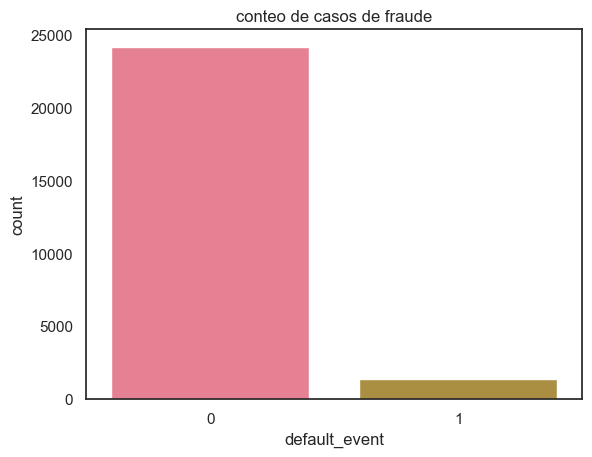

In [66]:
# porentaje de casos de tgt y no tgt contenidos en el dataframe

print('porcentaje de tgt: ',df2[tgt].value_counts()[1] /df2.shape[0] * 100)
print('porcentaje de no tgt: ',df2[tgt].value_counts()[0] /df2.shape[0] * 100)
sns.set_theme(style = 'white',palette = 'husl')
ax = sns.countplot(x = 'default_event' , data = df2)
ax.set_title('conteo de casos de fraude')

In [70]:
df2['num_bankrupt_iva'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: num_bankrupt_iva, dtype: float64

In [71]:
# casos de fraude y no fraude vistos por experiencia requerida

plt.figure(1,figsize = (25,10))
sns.countplot(hue = df2.defaul_event, x = df2.num_bankrupt_iva)
plt.title('Casos de fraude vistos por tipo de experiencia requerida')

AttributeError: 'DataFrame' object has no attribute 'defaul_event'

<Figure size 2500x1000 with 0 Axes>

In [ ]:
def freq(df,var):
    
    if type(var) != list:
        var = [var]
    
    for v in var:
        aux = df[v].value_counts().to_frame().rename(columns = {'count':'FA'})
        aux['FR'] =  aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(np.cumsum )
        print(f'Frecuencias para la variable {v} \n')
        display(aux)
        print('\n')

In [ ]:
# frecuencias
freq(df2,var_cat)

#### 3.2 Identificación de variables unarias

In [ ]:
# se sacan las variables : 
# var_cat no aplicables
# num_bankrupt
# num_bankrupt_iva
# num_iva
# arrears_status
# arrears_segment
# live_status
# repaid_status
# month
# arrears_event
# bannkrupt_event
# term_expiry_event
# avg_mia_6m
# max_mia_6m
# dentro de la lista de var_cat debido a que se consideran como variables unarias, es decir; que la mayor parte de la información se concentra en 
# una categoría en particular

# las nuevas variables categoricas
var_cat = ['num_ccj','pl_flag','region','repayment_type','worst_arrears_status','emp_length']

In [ ]:
freq(df2,var_cat)

#### 3.3 Agrupación de atributos en categorías mas compactas, solo variables vategorícas

#### Función de normalización

In [ ]:
#def normalizar(df,v,umbral):
    
 #   aux = df[v].value_counts(True).to_frame().rename(columns = {'proportion': 'w'})
 #   aux[f'n_{v}'] = np.where( aux ['w'] < umbral , 'catego_peq' , aux.index )

  #  moda = aux.head(1)[f'n_{v}'].values[0]

#    if aux.loc[aux[f'n_{v}'] == 'catego_peq' ]['w'].sum() < umbral:
#        aux[f'n_{v}'].replace( {'catego_peq': moda} , inplace=True)

 #   aux.drop('w', axis = 1, inplace = True)
  #  #aux.reset_index(inplace=True)

   # #display(aux)
   # #return df.merge(aux,left_on = [v], right_on ='index', how ='inner').drop('index',axis = 1)
   # return pd.merge(df,aux, left_on= [v], right_index = True, how = 'inner')

In [ ]:
# revisar la función porque no funciona bien
#for v in var_cat: df3 = normalizar(df2,v,0.05)

In [ ]:
#df3.groupby(['n_emp_length'])['n_emp_length'].count().to_frame()

In [ ]:
#se sustituye la variable 'emp_lenght' por su variable normalizda 'n_emp_lenght'
#var_cat = ['num_ccj','pl_flag','region','repayment_type','worst_arrears_status','n_emp_length']

In [ ]:
#freq(df3,var_cat)

#### 3.4 Discretización de variables, variables continuas

#### Función de discretización

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
def discretizar(df, v, k):

    kb = KBinsDiscretizer( n_bins = k , encode ='ordinal', strategy = 'quantile')
    kb.fit(df[[v]])
    df[f'd_{v}_{k}'] = pd.cut( df[v] , bins = kb.bin_edges_[0] , include_lowest = True ).astype(str)

    return df

In [ ]:
for v in var_con: 
    for k in range(2,6): discretizar( df2 , v , k )

In [ ]:
var_con_dis = df2.filter(like ='d_').columns.to_list()

In [ ]:
list(var_con_dis)

In [ ]:
var_con_dis.pop(0)
#list(var_con_dis)

In [ ]:
var_cat = var_cat + var_con_dis
list(var_cat)

#### 4.0 Partición de los datos

In [ ]:
# creación del split
from sklearn.model_selection import train_test_split

X = df2[var_cat + var_con + tgt +['id']].copy()
#Y = df2[tgt + ['id']].copy()
Y = df2[tgt].copy()

Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size=.3)

In [ ]:
Xt.shape, Xv.shape, Yt.shape[0], Yv.shape[0]

#### 5.0 Análisis Univariado

#### 5.1 Information Value

#### Función

In [ ]:
#def calculo_iv( df, v, tgt ):
#    aux = df.pivot_table( index = v, 
#                         columns= tgt, 
#                         values = um[0], 
#                         aggfunc= 'count', 
#                         fill_value=0 )

#    aux[list( range(2) ) ] = aux/aux.apply(np.sum)

#    aux['w'] = np.log( aux[0] / aux[1] )
#    aux['iv'] = (aux[0] - aux[1]) * aux['w']

#    return v, aux['iv'].sum()

In [ ]:
#pip install optbinning

In [ ]:
from optbinning import BinningProcess, OptimalBinning

In [ ]:
# Getting IV value for numerical variables 
iv_list_con = []

for val in var_con:

    x = Xt[val].values
    y = Xt['default_event'].values
    optb = OptimalBinning(name = val, dtype = 'numerical', solver = 'cp')
    optb.fit(x, y)
    binning_table = optb.binning_table
    iv_list_con.append(binning_table.build().loc['Totals', 'IV'])

In [ ]:
# Getting IV value for categorical variables 
iv_list_cat = []

for val in var_cat:

    x2 = Xt[val].values
    y2 = Xt['default_event'].values
    optb2 = OptimalBinning(name = val, dtype = 'categorical', solver = 'cp')
    optb2.fit(x2, y2)
    binning_table2 = optb2.binning_table
    iv_list_cat.append(binning_table2.build().loc['Totals', 'IV'])

In [ ]:
optb.status

In [ ]:
optb2.status

In [ ]:
iv_dict = {'Variable': var_con, 'IV': iv_list_con}
iv_df_con = pd.DataFrame.from_dict(iv_dict)
iv_df_con = iv_df_con.sort_values(by = 'IV', ascending=False)
iv_df_con

In [ ]:
iv_dict2 = {'Variable': var_cat, 'IV': iv_list_cat}
iv_df_cat = pd.DataFrame.from_dict(iv_dict2)
iv_df_cat = iv_df_cat.sort_values(by = 'IV', ascending=False)
iv_df_cat

#### 5.1 Identificación de mejores variables predictivas

In [ ]:
iv_df_con['rankeo'] = iv_df_con.apply(lambda x: 0 if x['IV'] == 0 or x['IV'] == -1
                                else 1 if x['IV'] > 0 and x['IV'] <= 0.02  # 1st condition
                                else  2 if x['IV'] > 0.02 and x['IV'] <= 0.1 # 2nd condition
                                else 3 if x['IV'] > 0.1 and x['IV'] <= 0.3 # 3rd condition
                                else 4 if x['IV'] > 0.3 and x['IV'] <= 0.5 # 4rd condition
                                else 5 if x['IV'] > 0.5 # 5rd condition 
                                else np.nan,axis = 1)

In [ ]:
iv_df_cat['rankeo'] = iv_df_cat.apply(lambda x: 0 if x['IV'] == 0 or x['IV'] == -1
                                else 1 if x['IV'] > 0 and x['IV'] <= 0.02  # 1st condition
                                else  2 if x['IV'] > 0.02 and x['IV'] <= 0.1 # 2nd condition
                                else 3 if x['IV'] > 0.1 and x['IV'] <= 0.3 # 3rd condition
                                else 4 if x['IV'] > 0.3 and x['IV'] <= 0.5 # 4rd condition
                                else 5 if x['IV'] > 0.5 # 5rd condition 
                                else np.nan,axis = 1)

In [ ]:
iv_df_con.loc[(iv_df_con['rankeo'] == 3) | (iv_df_con['rankeo'] == 4)].reset_index(drop=True)

In [ ]:
iv_df_con['id'] = iv_df_con.apply(lambda x: 0 if x['rankeo'] < 3 or x['rankeo'] == 5 else 1, axis = 1)
iv_df_con

In [ ]:
iv_df_cat = iv_df_cat.loc[(iv_df_cat['rankeo'] == 3) | (iv_df_cat['rankeo'] == 4)].reset_index(drop = True)
iv_df_cat['raiz'] = iv_df_cat['Variable'].map( lambda x: '_'.join(x.split('_')[1:2] ) )
iv_df_cat = iv_df_cat.sort_values(by = ['raiz','IV'],ascending = [1,0]).reset_index(drop = True)
iv_df_cat['id'] = iv_df_cat.groupby('raiz').cumcount() + 1
iv_df_cat

In [ ]:
iv_df_con2 = iv_df_con.loc[iv_df_con.id == 1]
iv_df_con2

In [ ]:
iv_df_cat2 = iv_df_cat.loc[iv_df_cat.id == 1]
iv_df_cat2

#### 5.2 Mejores variables predictivas

In [ ]:
best_var_con = iv_df_con2['Variable'].tolist()
best_var_cat = iv_df_cat2['Variable'].tolist()
best_var = best_var_con + best_var_cat 
len(best_var) , best_var

#### 5.3 Segunda partición de los datos tomando en cuenta la mejores variables predictivas

In [ ]:
Xt_final = Xt[best_var].copy()
Xv_final = Xv[best_var].copy()

In [ ]:
Xt_final.shape, Xv_final.shape, Yt.shape[0], Yv.shape[0]

In [ ]:
Yt.head()

In [ ]:
Xt_final.info()

#### 6.0 Transformación WOE

#### 6.1 Codificación / Diccionario / Mapa WoE

In [ ]:
binning_process = BinningProcess(best_var)

In [ ]:
# replacing values of variables with woe
Xt_woe = binning_process.fit_transform(Xt_final,Yt)
Xv_woe = binning_process.fit_transform(Xv_final,Yv)

In [ ]:
#def codificacion_woe(df, v, tgt):
#    aux = df.pivot_table( index=v,
#                          columns=tgt,
#                          values=um[0],
#                          aggfunc='count',
#                          fill_value=0)

#    aux[list( range(2) )] = aux / aux.apply(np.sum)

#    aux['w'] = np.log( aux[0] / aux[1] )

#    aux.drop(range(2) , axis=1 , inplace=True )

#    aux = aux.to_dict()['w']
    
#    return v, aux

In [ ]:
mapa_woe = list( map(  lambda v: codificacion_woe( Xt , v , tgt  ) , best_var  ) )

In [ ]:
for v, mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)

In [ ]:
print(Xt.shape, Xv.shape, Yt.shape[0], Yv.shape[0])

In [ ]:
var_woe = Xt.filter(like='w_').columns.tolist()
var_woe

In [ ]:
Xt[var_woe].corr()

In [ ]:
# w_d_avg_bureau_score_6m_2 sale de la lista de variables debido a la alta correlacion con la variable
# w_d_avg_bureau_score_2 
del var_woe[7]
var_woe

In [ ]:
# se encontraron dos valores con valor infinito, se eliminaron de 
pd.set_option('display.max_columns',None)

Xt.loc[Xt.loc[:, 'w_num_ccj'] == np.inf]

In [ ]:
Yt.loc[Yt.loc[:, 'id'] == 6526999]

In [ ]:
Yt.loc[Yt.loc[:, 'id'] == 1041048]

In [ ]:
# se indentificaron que son los registros  con id '6526999','1041048' y se eliminan de Xt
Xt.drop(Xt[Xt['id'] == 6526999].index, inplace = True)

In [ ]:
# se indentificaron que son los registros '6526999','1041048' y se eliminan de la Xt
Xt.drop(Xt[Xt['id'] == 1041048].index, inplace = True)

In [ ]:
# se indentificaron que son los registros '6526999','1041048' y se eliminan de la target
Yt.drop(Yt[Yt['id'] == 6526999].index, inplace = True)
Yt.drop(Yt[Yt['id'] == 1041048].index, inplace = True)

In [ ]:
tad1 = Xt[um + var_woe].merge(Yt , on = um , how='inner')

In [ ]:
tad1.head()

#### Modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

#### Entrenamiento

In [ ]:
tad1 = Xt[um + var_woe].merge(Yt , on = um , how='inner')

In [ ]:
m_reg_log = LogisticRegression()

In [ ]:
m_reg_log.fit( Xt[var_woe] , Yt[tgt] )

In [ ]:
m_reg_log.intercept_

In [ ]:
m_reg_log.coef_

In [ ]:
Xv.loc[Xv.loc[:, 'w_num_ccj'] == np.inf]

In [ ]:
Yv.loc[Yv.loc[:, 'id'] == 2610320]

In [ ]:
Yv.drop(Yv[Yv['id'] == 2610320].index, inplace = True)
Xv.drop(Xv[Xv['id'] == 2610320].index, inplace = True)

In [ ]:
pd.DataFrame(m_reg_log.predict_proba(Xv[var_woe]))

In [ ]:
pd.DataFrame(m_reg_log.predict(Xv[var_woe])).value_counts()

In [ ]:
Yv[tgt].value_counts()

In [ ]:
rest_v = m_reg_log.predict(Xv[var_woe])

In [ ]:
unique , counts = np.unique( rest_v , return_counts=True )

In [ ]:
dict(zip( unique , counts  ))

#### Evaluación

In [ ]:
from scikitplot.metrics import plot_roc_curve

In [ ]:
plot_roc_curve( y_true = Yt[tgt] , y_probas = m_reg_log.predict_proba( Xt[var_woe] ) , curves = 'macro' )
plot_roc_curve( y_true = Yv[tgt] , y_probas = m_reg_log.predict_proba( Xv[var_woe] ) , curves = 'macro' )

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [ ]:
def metricas(model,Xt,Xv,yt,yv):
    print(' Métricas para modelo de clasificación: \n')

    print(' Valor ROC train : %.3f'   %roc_auc_score( y_score = model.predict_proba(Xt)[:,1] , y_true = yt  )   )

    print(' Valor ROC validate : %.3f'   %roc_auc_score( y_score = model.predict_proba(Xv)[:,1] , y_true = yv  )   )

    print(' Valor ACC : %.3f\n' %accuracy_score( y_pred = model.predict(Xv) , y_true = yv) )

    print(' Matriz de confusión: ', '\n', confusion_matrix(y_pred = model.predict(Xv) , y_true = yv ) )

In [ ]:
metricas( m_reg_log,Xt[var_woe] ,Xv[var_woe], Yt[tgt], Yv[tgt])

#### Transformación Scoring

In [ ]:
PDO = 30
base_score = 700
base_odds = 2

factor = PDO / np.log(2)

offset = base_score - factor * np.log(base_odds)

print(factor, offset)

In [ ]:
betas = m_reg_log.coef_[0].tolist()
beta0 = m_reg_log.intercept_[0]

In [ ]:
betas , beta0

In [ ]:
n = len(betas)
n

In [ ]:
for v, beta in zip( var_woe , betas ):
    print(v, beta)
    
    Xt[f'p_{v}'] = np.ceil( (-Xt[v] * beta + beta0/ n ) * factor + offset / n )
    Xv[f'p_{v}'] = np.ceil( (-Xv[v] * beta + beta0/ n ) * factor + offset / n )

In [ ]:
Xt.head(1)

In [ ]:
var_puntos = [c for c in Xv.columns.tolist() if c[:2] == 'p_']
var_puntos

In [ ]:
Xt['score'] = Xt[var_puntos].sum(axis=1)
Xv['score'] = Xv[var_puntos].sum(axis=1)

In [ ]:
import seaborn as sns

In [ ]:
sns.distplot(Xt['score'], hist = True)
sns.distplot(Xv['score'], hist = True)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
# y_pred_prob = rest_v[:,1]
rest_v

In [ ]:
precision, recall, threshold = precision_recall_curve(Yv[tgt], rest_v)
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()
#Yv[tgt]

In [ ]:
# a mano
# precision
# 0.952052
# recall
# 0.994603

# A model with high precision and recall will return very few results, but most of the predictions are correct.
# However, a model with low precision and high recall return many results, but most of the predictions will be incorrect. 
# An Ideal model will have high precision and high recall and will return many results with all correctly predicted, 
# while a baseline model will have very low precision.

In [ ]:
# curva de precision and recall
# cómo saber si los datos están desbalanceados?